<a href="https://colab.research.google.com/github/znoble360/cap4630/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports/sources

References: 
<br> https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf
<br>https://colab.research.google.com/drive/1hUc_4HTtPQ2Xq0XXnokV4uoK84zmmvQR
<br>https://www.geeksforgeeks.org/understanding-logistic-regression/

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd

# Define constants

In [0]:
w = 1
b = 2
mu = 1
sigma = 1
m = 1000
num_epochs = 100
num_batch_size = int(m*0.8/40)
lr = 0.001

# Problem 1

## Make Data

### Define functions

In [0]:
def get_random_data(w, b, mu, sigma, m):
    
    x_1 = np.random.uniform(0, 1, m)
    x_2 = np.empty([m])
    labels = np.empty([m])

    # generate x_2 values
    for i in range(m):
        c = np.random.randint(2)
        n = np.random.normal(mu, sigma, m)
        val = (w * x_1[i]) + b + (((-1) ** c) * n[i])

        x_2[i] = val
        labels[i] = c

    data = np.stack((x_1, x_2))

    return data.T, labels.T

In [0]:
def display_random_data(data, labels):
    for i in range(m):
        # choose color based on whether label 0 or 1
        # blue for 0 and red for 1
        if labels[i] == 0:
            color = "b."
        else:
            color = "r."

        plt.plot(data[i][0], data[i][1], color)

### Split data
Into training and test sets

In [0]:
training_size = int(m * 0.8)
test_size = m - training_size

data, labels = get_random_data(w, b, mu, sigma, m)

split = np.split(data, [training_size])
training_data = split[0]
test_data = split[1]

split = np.split(labels, [training_size])
training_labels = split[0]
test_labels = split[1]

## Display data

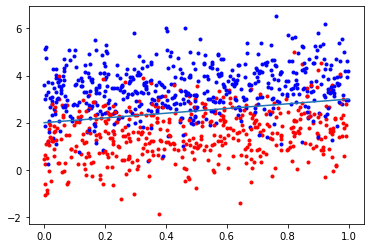

In [6]:
display_random_data(data, labels)
plt.plot([0, 1], [b, w+b])

# Problem 2

## Building and Testing

### Define the build model function

In [0]:
def build_and_compile_model():
    # build model
    model = tf.keras.models.Sequential()

    #model.add(tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)))
    #model.add(tf.keras.layers.Dense(16, activation='relu'))
    #model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))

    # compile model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    
    return model

### Build then test model

In [8]:
model = build_and_compile_model()

history = model.fit(training_data,
                    training_labels,
                    epochs=num_epochs,
                    batch_size=num_batch_size,
                    validation_data=(test_data, test_labels))

Epoch 1/100
40/40 [==============================] - 0s 6ms/step - loss: 0.7120 - accuracy: 0.5537 - val_loss: 0.7054 - val_accuracy: 0.5700
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5575 - val_loss: 0.6804 - val_accuracy: 0.5700
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.5587 - val_loss: 0.6581 - val_accuracy: 0.5650
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.5650 - val_loss: 0.6397 - val_accuracy: 0.5650
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.5750 - val_loss: 0.6246 - val_accuracy: 0.5700
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.5838 - val_loss: 0.6137 - val_accuracy: 0.5700
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.5950 - val_loss: 0.6047 - val_accuracy: 0.5900
Epoch 8/100
4

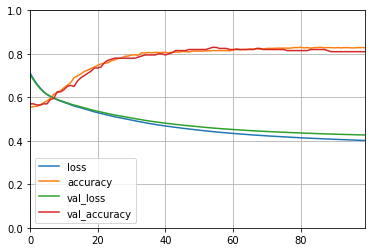

In [9]:
pd.DataFrame(history.history).plot()
plt.grid(True)

plt.gca().set_ylim(0, 1) 

plt.show()

### Model heatmap

In [0]:
tf.keras.backend.set_floatx('float64')

x = np.linspace(0, 1)
y = np.linspace(-2, 6)

z = np.ones([50, 50])


for i in range(50):
    for j in range(50):
        z[j][i] = model(np.matrix([x[i], y[j]]))

### Display heatmap

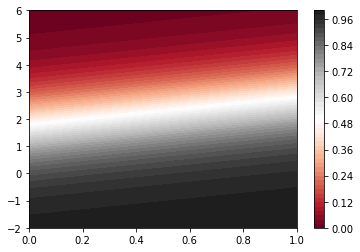

In [11]:
plt.contourf(x, y, z, 50, cmap='RdGy')
plt.colorbar()

### Model predicted line

I know the decision line sits where
\begin{equation*}
\sigma (z) = 0.5
\end{equation*}
and
\begin{equation*}
\sigma (z) = \frac{1}{1+e^{-z}}
\end{equation*}
so solving for z when 
\begin{equation*}
\sigma (z) = 0.5
\end{equation*}
I got 
\begin{equation*}
z = 0
\end{equation*}

I also know that for 2 weights, 
\begin{equation*}
z = w_0*x_0+w_1*x_1+b
\end{equation*}
then plugged in z = 0 to get
\begin{equation*}
0 = w_0*x_0+w_1*x_1+b
\end{equation*}
and solved to get the equation 
\begin{equation*}
x_1 = \frac{w_0}{-w_1}*x_0 + \frac{b}{-w_1}
\end{equation*}
for the decision line of the model

In [12]:
weights = model.get_weights()

print(weights)

w_0 = weights[len(weights)-2][0]
w_1 = weights[len(weights)-2][1]
b_0 = weights[len(weights)-1][0]

slope = -(w_0/w_1)
y_int = -(b_0/w_1)

y_0 = slope*(0) + y_int
y_1 = slope*(1) + y_int

[array([[ 1.1902486],
       [-1.1727493]], dtype=float32), array([2.0885644], dtype=float32)]
[1.780913]
[2.7958345]


## Display prediction line

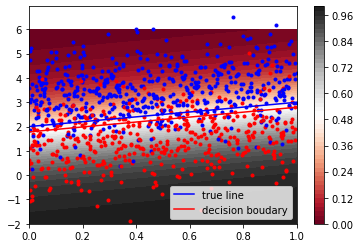

In [13]:
display_random_data(data, labels)
plt.plot([0, 1], [b, w+b], 'b', label='true line')
plt.plot([0, 1], [y_int, slope+y_int], 'r', label='decision boudary')

plt.legend()
plt.contourf(x, y, z, 50, cmap='RdGy')
plt.colorbar()

# Problem 3

## Logistic regression from scratch

In [14]:
num_features = 2
numpy_weights = np.ones(num_features+1)
new_training_data = np.hstack((np.ones([training_size, 1]), training_data))


def sigmoid(w, X):
    z = X.dot(w)
    return (1.0/(1 + np.exp(-z)))

def gradient(w, X, y):
    a = sigmoid(w, X)
    return (a - y).T.dot(X)
    

def bce_loss(w, X, y):
    prediction = sigmoid(w, X)
    return -y * np.log(prediction) - (1 - y) * np.log(1 - prediction)

def train_weights(X, y, w, learning_rate, epochs):
    for i in range(epochs):
        cost = bce_loss(w, X, y)
        w = w - learning_rate * gradient(w, X, y)

    return w

weights = train_weights(new_training_data, training_labels, numpy_weights, lr, num_epochs)

[ 3.07734565  1.44745726 -1.58951596]


###Modeling the decision line and heatmap from the weights made by the model from scratch

In [15]:
print(weights)

b_0 = weights[0]
w_1 = weights[1]
w_2 = weights[2]

slope = -(w_1/w_2)
y_int = -(b_0/w_2)

y_0 = slope*(0) + y_int
y_1 = slope*(1) + y_int

[ 3.07734565  1.44745726 -1.58951596]
1.9360268952758486
2.8466545924848754


In [0]:
tf.keras.backend.set_floatx('float64')

x = np.linspace(0, 1)
y = np.linspace(-2, 6)

z = np.ones([50, 50])


for i in range(50):
    for j in range(50):
        z[j][i] = sigmoid(weights, np.array([1, x[i], y[j]]))

## Display from scratch results

###Test from scratch model

####Average BCE loss

In [28]:
new_test_data = np.hstack((np.ones([test_size, 1]), test_data))
bce_losses = bce_loss(weights, new_test_data, test_labels)
avg_bce = sum(bce_losses) / len(bce_losses)
print(avg_bce)

0.4130266137294995


####Accuracy

In [35]:
test_predictions = sigmoid(weights, new_test_data)

for i in range(len(test_predictions)):
    if (test_predictions[i] >= 0.5):
        test_predictions[i] = 1
    else:
        test_predictions[i] = 0

correct = 0

for i in range(len(test_predictions)):
    if (test_predictions[i] == test_labels[i]):
        correct += 1

accuracy = correct / test_size
print(accuracy)

0.835


###Heatmap

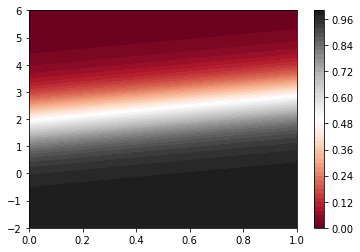

In [22]:
plt.contourf(x, y, z, 50, cmap='RdGy')
plt.colorbar()

###Decision line

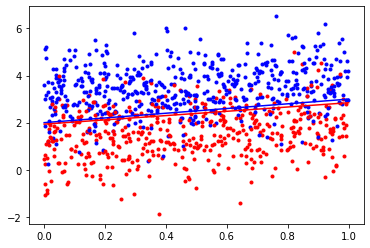

In [16]:
display_random_data(data, labels)
plt.plot([0, 1], [b, w+b], 'b', label='true line')
plt.plot([0, 1], [y_int, slope+y_int], 'r', label='decision boudary')

###Decision line and heat map together

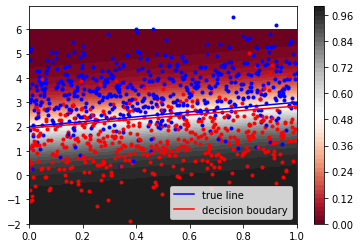

In [23]:
display_random_data(data, labels)
plt.plot([0, 1], [b, w+b], 'b', label='true line')
plt.plot([0, 1], [y_int, slope+y_int], 'r', label='decision boudary')

plt.contourf(x, y, z, 50, cmap='RdGy')
plt.colorbar()
plt.legend()